2019-02-04: INSeq Klebsiella Report
===================================

## Purpose

* This notebook will contain an overview of the analysis done on INSeq data from a colonization experiment of *Klebsiella Pneumonia*

### Computational Experiments:

1. Pyinseq - gave a table with hits per gene in every sample, this was used in analysis
2. DESeq Statistical Analysis - did statistical test taking into consideration the behavior of count data produced from high-throughput sequencing experiments.

### Import summary gene table data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import sys; sys.path.append("analysis/notebooks/figures_and_supplements/")
from helper import figure1

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, widgets

In [87]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [32]:
summary_df = pd.read_csv("2019-01-31_E1004_renamed.txt", sep='\t')
summary_df.head(1)

,Contig,Start,End,Strand,Length,PID,Gene,Synonym,Code,COG,Product,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08,input_E1004_13,input_E1004_14,input_E1004_15
0,CP009208,15,227,+,213,AIK78632.1,-,VK055_0001,-,-,lambda phage tail tape-measure family protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sample correlation was performed using **spearman correlation
** Less sensitive to outliers

![spearman_heat_E1004](analysis/figures/2019-01-31_E1004_spearman_heatmap.png)

### And a T50 Test
Counts how many hits made up for than 50% of all hits in the sample. Is used to show if there is a bottleneck in the INSeq experiment

<BarContainer object of 9 artists>

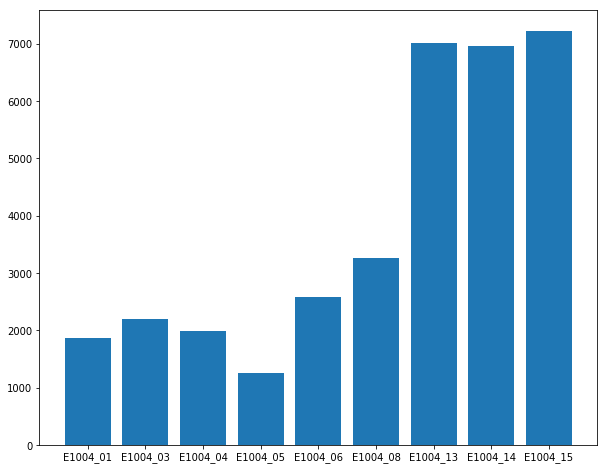

In [86]:
with open("experiments/2018-10-26_pyinseq-runs/klebsiella-disruption_09/log.txt") as log:
    nfifty_d = {}
    for line in log:
        if "N50" in line.split(" "):
            line = line.split(" ")
            if len(line) == 10:
                pass
            else:
                sample = line[10].replace(":","")
                n50 = line[11].replace("\n", "")
                nfifty_d[sample] = int(n50)

fig_T50, ax_T50 = plt.subplots()
fig_T50.set_size_inches(10,8)

# Set x labels
ax_T50.set_xticks(range(len(nfifty_d)))
ax_T50.set_xticklabels(list(nfifty_d.keys()))

ax_T50.bar(range(len(nfifty_d)), list(nfifty_d.values()), align='center')

##### Conclusion
* No significant bottleneck was observed

### DESeq statistical analysis with Fold-Change and pvalue calculations
* After samples were processed by Pyinseq and hits were mapped to correspondent gene, the count table was submitted to the DESeq pipeline. Even though DESeq was orginally meant for studying differentially expressed genes by using RNA-Seq, the statistical tools it uses can be easily implemented for INSeq experiments since the data behaves the same way. This way we can normalize the data to avoid any bias by low-count genes and errors in the sequencing process. 

It outputs a p-adjusted value which uses Benjamini-Hochberg procedure to recude false true discoveries (Type-1 Errors). Also includes log2FC using input as the denominator of the ratio.

In [93]:
deseq_df = pd.read_csv("2019-01-31_deseq_table_results.txt", sep='\t')
columns = list(deseq_df.columns[2:])
deseq_df.set_index("Synonym").head(3)

,Gene,baseMean,Ketamine log2FC,Ketamine stat,Ketamine padj,Propofol log2FC,Propofol stat,Propofol padj
Synonym,,,,,,,,
VK055_0001,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0002,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN
VK055_0003,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Previously selected genes
* Previous genes were selected based on the fold-change regarding the input count values. However, after running both Mann-Whitney test and a Wald T-Test, from DESeq, many were shown to be statistically non-significant.

,Gene,baseMean,Ketamine log2FC,Ketamine stat,Ketamine padj,Propofol log2FC,Propofol stat,Propofol padj,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08,input_E1004_13,input_E1004_14,input_E1004_15
Synonym,,,,,,,,,,,,,,,,,
VK055_4268,-,249.877234,-0.007580,-0.017447,0.993238,0.159189,0.366730,0.899705,211.980929,226.119278,145.085472,192.125824,243.771868,299.854134,312.925134,282.305213,282.003732
VK055_2084,-,38.211105,-3.809187,-2.544158,0.098706,-3.171606,-2.137430,0.209131,18.226091,0.000000,0.000000,20.807851,0.000000,0.506755,60.779961,139.927699,157.649930
VK055_3202,ilvC,206.286124,-6.809364,-2.934546,0.047139,-8.416148,-3.534346,0.011097,0.000000,0.000000,14.865315,0.000000,3.750336,0.000000,922.699031,654.028693,653.400331
VK055_3875,yrbC,92.208836,-4.222218,-4.660259,0.000173,-5.156003,-5.523902,0.000004,6.075364,0.588597,25.568341,7.398347,3.456192,3.692072,284.791486,317.323164,338.969065
VK055_0094,-,76.992425,-1.774010,-2.637808,0.084520,1.540464,2.407676,0.134547,5.746966,16.578810,13.845979,87.046176,204.650711,156.587275,70.510395,54.832636,75.495352
VK055_1993,-,30.485568,-3.079750,-2.961974,0.044807,0.460438,0.480212,0.853197,0.000000,9.908046,0.000000,39.766115,38.018116,50.385919,40.402456,45.825961,48.786067
VK055_4623,glnB,65.778965,-2.701238,-3.553712,0.009945,0.421214,0.583049,0.819955,11.658130,11.771936,10.787971,121.147932,31.914628,115.612519,109.996216,90.138801,89.682398
VK055_1398,-,16.053312,1.700797,1.340292,0.473628,-2.719552,-1.901192,0.287824,10.098239,37.768296,50.202291,0.000000,0.000000,5.067549,19.954442,10.159529,11.581262
VK055_1930,fepC,8.216274,-0.805784,-0.524374,0.812789,-3.071439,-1.866239,0.301078,15.352608,0.000000,0.000000,0.000000,2.132544,0.000000,10.435538,21.760126,21.787249


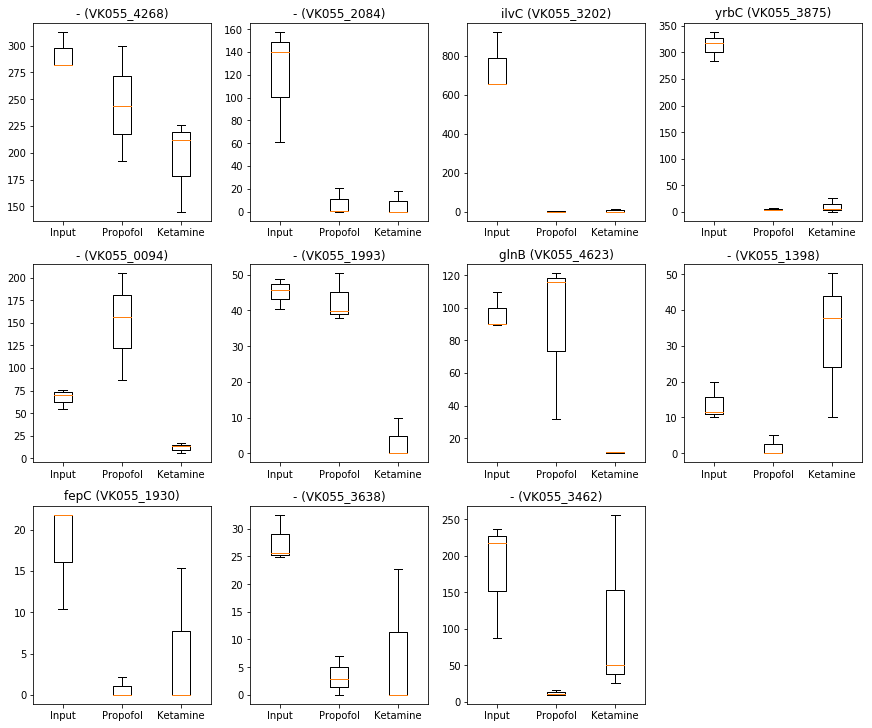

In [94]:
previous_genes = [gene.replace("\n","") for gene in open("data/genesOfInterest.txt")]
ella_genes = deseq_df.set_index("Synonym").loc[previous_genes]
ella_genes = pd.concat([ella_genes, summary_df.set_index("Synonym").iloc[:,10:]], axis=1, join='inner')

fig_ella = plt.figure(figsize=(12,10), constrained_layout=True)
grid_ella = mpl.gridspec.GridSpec(3,4, figure=fig_ella)


r = 0
c = 0
for i in range(len(ella_genes)):
    ax = fig_ella.add_subplot(grid_ella[r,c])
    if c == 3:
        r += 1
        c = 0
    else:
        c += 1
    
    gene = {
        "Input": list(ella_genes.iloc[i,14:]),
        "Propofol": list(ella_genes.iloc[i,11:14]),
        "Ketamine": list(ella_genes.iloc[i,8:11])
    }
    
    ax.boxplot(list(gene.values()), labels=list(gene.keys()), whis=10)
    ax.set_title(f"{ella_genes.iloc[i,:].Gene} ({ella_genes.iloc[i,:].name})")
ella_genes

In [98]:
def save_genes(b):
        filename = input("File name for output")
        with open(filename, 'w') as f:
            for (i,row) in deseq_df[ (deseq_df[condition + ' log2FC'] < Fold_Change) & (deseq_df[condition + " padj"] < pvalue)].iterrows():
                print("Hello")
        return
    

    
    


@interact
def filter_df(condition=['Ketamine', 'Propofol'], Fold_Change=-10 ,
              pvalue=widgets.FloatSlider(min=0,max=0.5,step=0.01, value=0.05)):
    button = widgets.Button(description="Save genes")
    display(button)
    button.on_click(save_genes)
    return deseq_df[ (deseq_df[condition + ' log2FC'] < Fold_Change) & (deseq_df[condition + " padj"] < pvalue)]



interactive(children=(Dropdown(description='condition', options=('Ketamine', 'Propofol'), value='Ketamine'), IntSlider(value=-10, description='Fold_Change', max=10, min=-30), FloatSlider(value=0.05, description='pvalue', max=0.5, step=0.01), Output()), _dom_classes=('widget-interact',))

### Scatter plot showing candidate genes in different conditions
![figure_1](analysis/notebooks/figures_and_supplements/figure_1/2019-01-10_f1_Draft3.png)

In [85]:
#ella_genes.to_csv("Mark_Meeting_collab/2019-02-01_previous_genes.csv", sep='\t')

### Previously selected genes on Volcano plot

In [69]:
fig, (prop_vol,ket_vol) = plt.subplots()
